In [ ]:
# Import necessary library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os


In [ ]:
# Simple column description - count, mean, std, min, ,max and percentile

In [29]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
print (df.describe())
df.head()

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [ ]:
## Check for NaNa , null , missing value

In [30]:
print("Missing value column")
print((df. isna().sum()), end="\n\n\n\n")
 # check if  any missing,none,NaNa values in the dataset


threshold = 0.05
null= df.isnull().mean()
count=  null[null>threshold].index.tolist()
print("Columns with more than 5% nulls:", count,  end="\n")

Missing value column
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64



Columns with more than 5% nulls: ['Comments']


In [ ]:
# Check for missing value

In [31]:
key_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"] # define the suggested columns as per instructed
print("Missing values per column:")
print ( df[key_cols].isnull().sum())


Missing values per column:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [ ]:
# Check for outliner

Missing values per column:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Descriptive statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      198.114691       1.146113       1.691606  
std       288.889073       1.239248       1.617053  
min         0.000

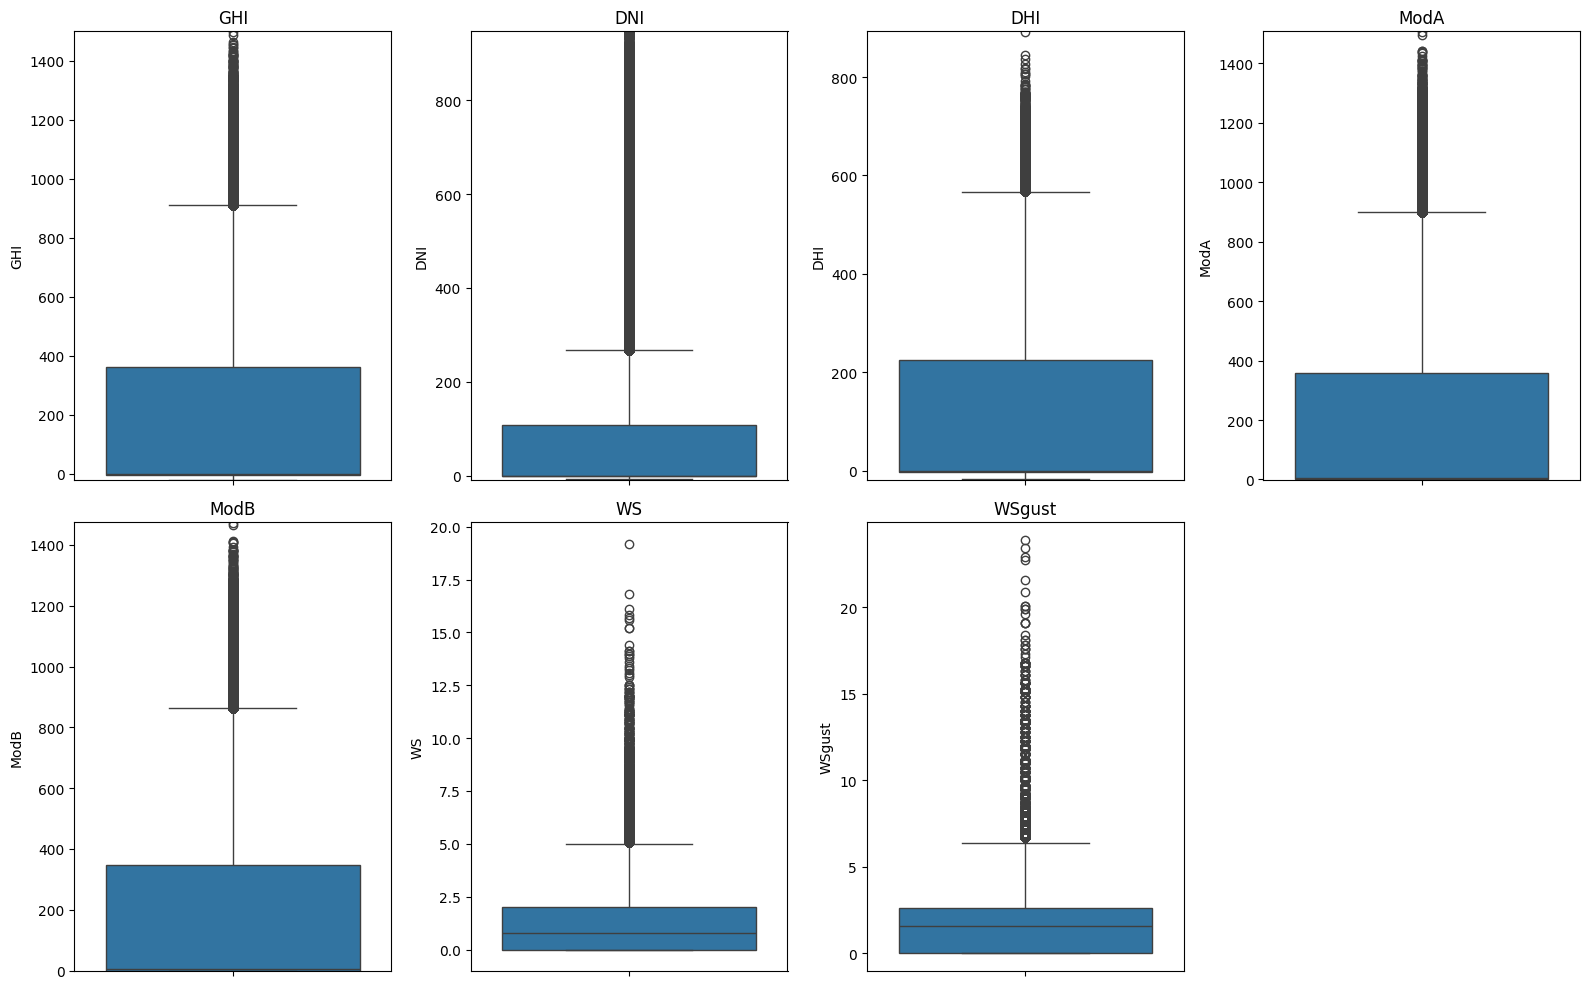

In [33]:

# -------------------------------
# 1️⃣ Columns
# -------------------------------
irradiance_cols = ['GHI', 'DNI', 'DHI']
sensor_cols = ['ModA', 'ModB', 'WS', 'WSgust']
all_cols = irradiance_cols + sensor_cols

# -------------------------------
# 2️⃣ Missing values
# -------------------------------
print("Missing values per column:")
print(df[all_cols].isna().sum())

# -------------------------------
# 3️⃣ Descriptive statistics
# -------------------------------
print("\nDescriptive statistics:")
print(df[all_cols].describe())

# -------------------------------
# 4️⃣ Outlier detection function using IQR
# -------------------------------
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# -------------------------------
# 5️⃣ Print ALL outliers per column
# -------------------------------
for col in all_cols:
    print("\n==========================")
    print(f" OUTLIERS IN {col}")
    print("==========================")

    outliers = find_outliers(df[col])
    total = len(outliers)

    print(f"Total outliers: {total}")

    if total == 0:
        print("✅ No outliers detected.")
    else:
        print(outliers.to_string())  # print all outlier values cleanly

# -------------------------------
# 6️⃣ Boxplots for visualization
plt.figure(figsize=(16, 10))
for i, col in enumerate(all_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    # Force y-axis to include all data (min and max)
    plt.ylim(df[col].min() - 1, df[col].max() + 1)  # small padding
plt.tight_layout()
plt.show()



In [ ]:
# Z-score - outlinear

In [34]:

# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# --- Step 1: Compute Z-scores ---
df_z = df[cols].apply(zscore)

# Flag rows where any |Z| > 3
outlier_mask = (df_z.abs() > 3).any(axis=1)
df['Outlier'] = outlier_mask

print(f"Total outliers detected: {outlier_mask.sum()}")
print(df[df['Outlier']])

Total outliers detected: 16292
               Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653     2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654     2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655     2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656     2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657     2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
522184  2022-10-27 15:05  167.2   -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
522185  2022-10-27 15:06  163.4   -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
522194  2022-10-27 15:15  183.5    0.3  181.6  173.7  168.7  29.3  70.2  4.9   
523792  2022-10-28 17:53   31.3   -0.5   30.2   34.3   32.3  28.4  79.5  5.0   
523794  2022-10-28 17:55   22.8   -0.8   21.4   26.5   25.0  27.9  80.4  5.0   

        

In [ ]:
# clean the dataset from missing, outlinears value

In [35]:

# -------------------------------
# 1️⃣ Define key columns
# -------------------------------
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# -------------------------------
# 2️⃣ Handle missing values (median)
# -------------------------------
for col in key_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# -------------------------------
# 3️⃣ Handle outliers (replace with median) safely
# -------------------------------
def replace_outliers_with_median(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median_val = df[col].median()
    # Use .loc to avoid SettingWithCopyWarning
    df.loc[(df[col] < lower) | (df[col] > upper), col] = median_val

# Apply for all key columns
for col in key_cols:
    replace_outliers_with_median(df, col)

# -------------------------------
# 4️⃣ Verify missing values and remaining outliers
# -------------------------------
print("Missing values after cleaning:")
print(df[key_cols].isna().sum())

def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]

for col in key_cols:
    remaining = check_outliers(df, col)
    print(f"{col} remaining outliers: {len(remaining)}")  # should be 0

# Optional: print sample of replaced outliers
for col in key_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    sample_outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    if len(sample_outliers) > 0:
        print(f"\nSample of outliers replaced in {col}:")
        print(sample_outliers.head(5))

# -------------------------------
# 5️⃣ Export cleaned DataFrame
# -------------------------------
country = "serraleone"
output_folder = "../data"   # save cleaned file one level up
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, f"{country}_clean.csv")

df.to_csv(output_file, index=False)
print(f"\n✅ Cleaned dataset saved to: {output_file}")


# -------------------------------
# 6️⃣ Ensure data/ is in .gitignore
# -------------------------------
gitignore_file = ".gitignore"
if os.path.exists(gitignore_file):
    with open(gitignore_file, "r+") as f:
        lines = f.read().splitlines()
        if "data/" not in lines:
            f.write("\ndata/\n")
            print("✅ Added 'data/' to .gitignore")
        else:
            print("✅ 'data/' already in .gitignore")
else:
    with open(gitignore_file, "w") as f:
        f.write("data/\n")
    print("✅ Created .gitignore and added 'data/'")


/tmp/ipykernel_8116/1760735823.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_8116/1760735823.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Missing values after cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
GHI remaining outliers: 26429
DNI remaining outliers: 117107
DHI remaining outliers: 1338
ModA remaining outliers: 37271
ModB remaining outliers: 36215
WS remaining outliers: 1331
WSgust remaining outliers: 0

Sample of outliers replaced in GHI:
653    814.0
654    826.0
655    851.0
656    823.0
657    810.0
Name: GHI, dtype: float64

Sample of outliers replaced in DNI:
521    0.5
522    0.5
523    0.6
524    0.7
525    0.6
Name: DNI, dtype: float64

Sample of outliers replaced in DHI:
631    551.8
632    555.5
633    552.6
650    552.4
660    552.7
Name: DHI, dtype: float64

Sample of outliers replaced in ModA:
652    767.6
653    878.0
654    883.0
656    878.0
657    864.0
Name: ModA, dtype: float64

Sample of outliers replaced in ModB:
651    689.3
652    748.9
653    856.0
654    861.0
656    856.0
Name: ModB, dtype: float64

Sample of outliers replaced 

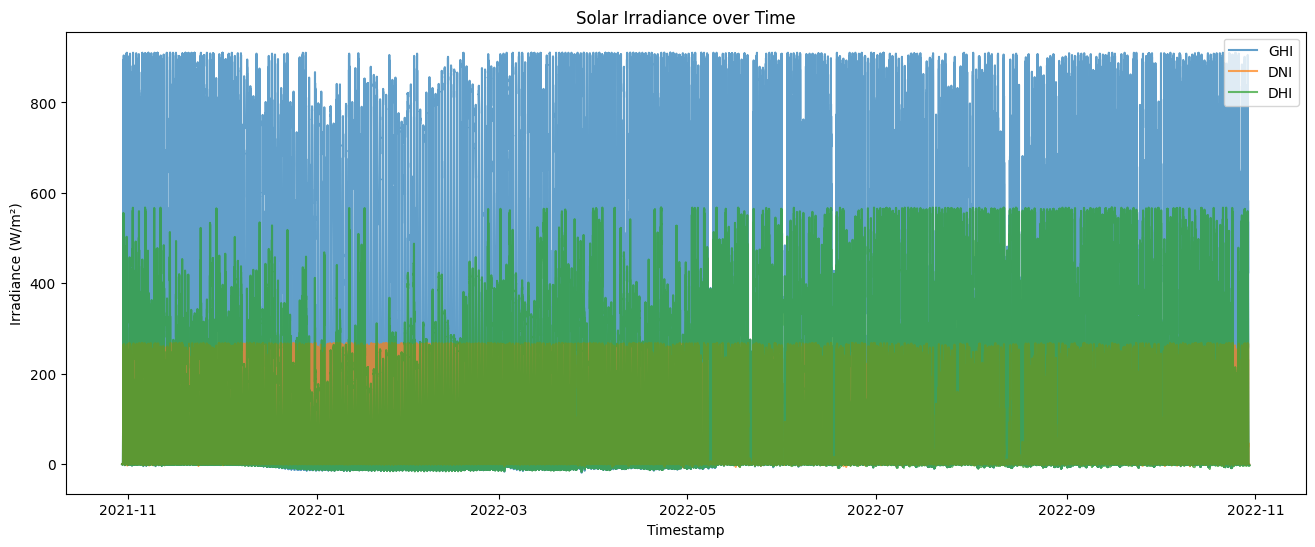

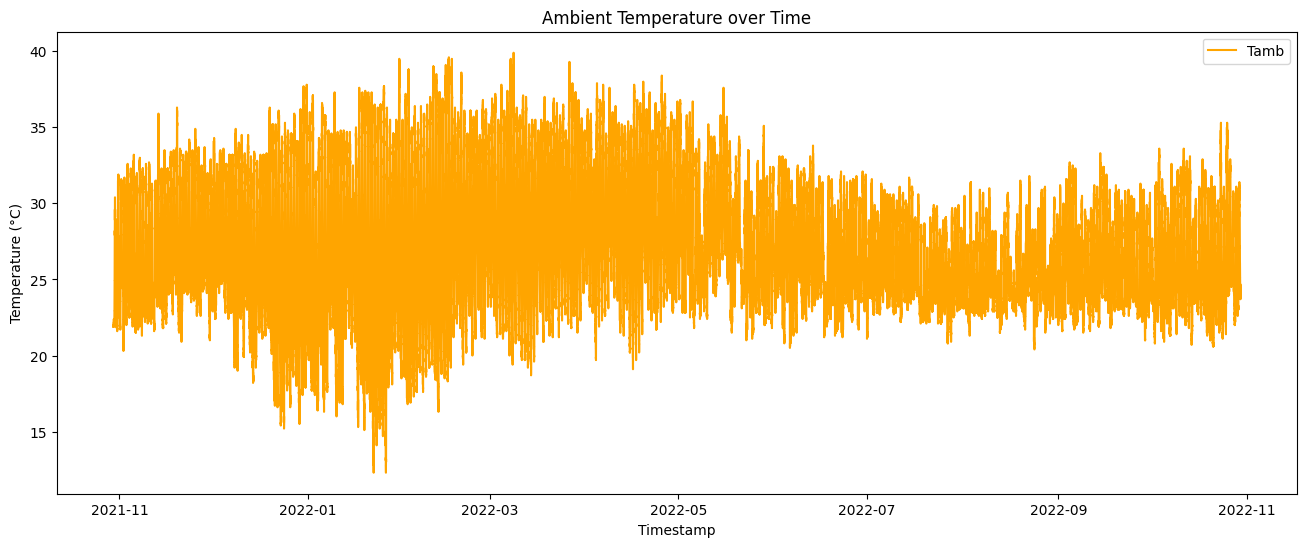

<Figure size 1200x600 with 0 Axes>

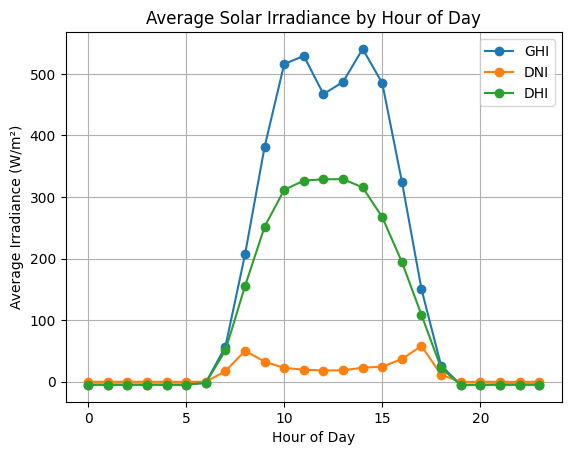

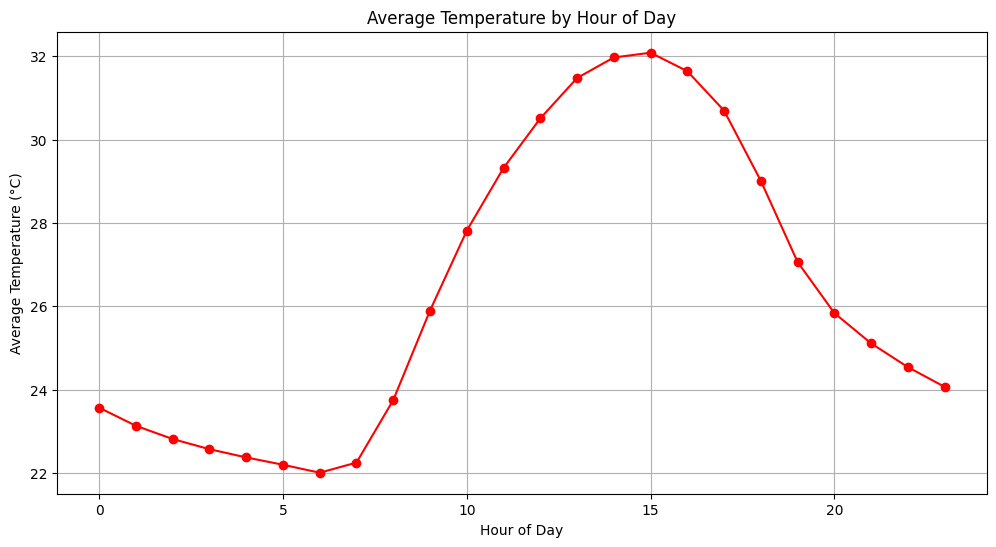

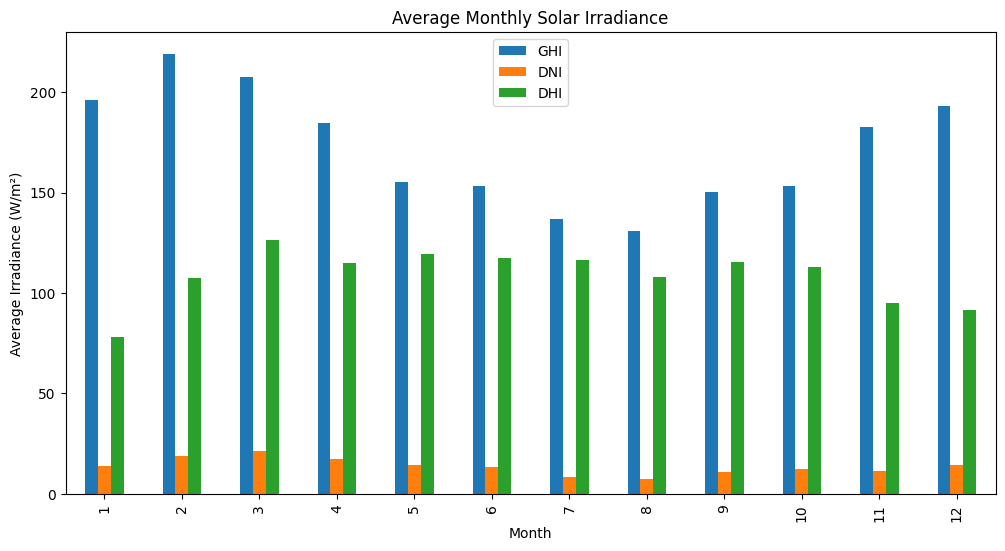

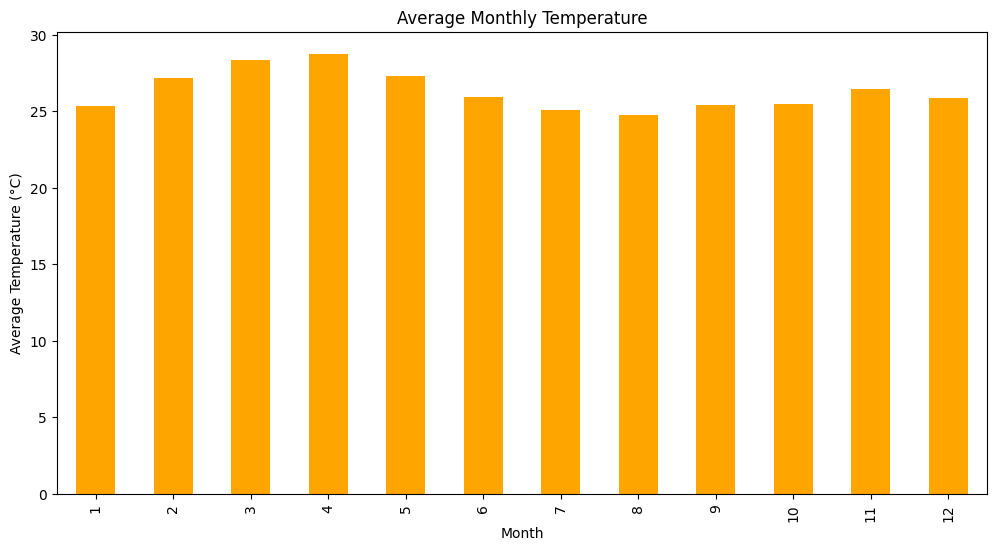

In [36]:

# -------------------------------
# 2️⃣ Convert Timestamp to datetime
# -------------------------------
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# -------------------------------
# 3️⃣ Set Timestamp as index (optional)
# -------------------------------
df.set_index('Timestamp', inplace=True)

# -------------------------------
# 4️⃣ Plot GHI, DNI, DHI over time (line chart)
# -------------------------------
plt.figure(figsize=(16,6))
plt.plot(df.index, df['GHI'], label='GHI', alpha=0.7)
plt.plot(df.index, df['DNI'], label='DNI', alpha=0.7)
plt.plot(df.index, df['DHI'], label='DHI', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.title('Solar Irradiance over Time')
plt.legend()
plt.show()

# -------------------------------
# 5️⃣ Plot Tamb (temperature) over time
# -------------------------------
plt.figure(figsize=(16,6))
plt.plot(df.index, df['Tamb'], color='orange', label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature over Time')
plt.legend()
plt.show()

# -------------------------------
# 6️⃣ Aggregate by hour to observe daily pattern
# -------------------------------
df_hourly = df.groupby(df.index.hour)[['GHI','DNI','DHI','Tamb']].mean()

plt.figure(figsize=(12,6))
df_hourly[['GHI','DNI','DHI']].plot(kind='line', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Irradiance (W/m²)')
plt.title('Average Solar Irradiance by Hour of Day')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
df_hourly['Tamb'].plot(kind='line', color='red', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Hour of Day')
plt.grid(True)
plt.show()

# -------------------------------
# 7️⃣ Optional: Aggregate by month to observe monthly trends
# -------------------------------
df['Month'] = df.index.month
df_monthly = df.groupby('Month')[['GHI','DNI','DHI','Tamb']].mean()

df_monthly[['GHI','DNI','DHI']].plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Irradiance (W/m²)')
plt.title('Average Monthly Solar Irradiance')
plt.show()

df_monthly['Tamb'].plot(kind='bar', figsize=(12,6), color='orange')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Temperature')
plt.show()


In [ ]:
# Post and pre clean comparison

Average sensor readings before cleaning (pre-clean):
ModA    206.643095
ModB    198.114691
dtype: float64

Average sensor readings after cleaning (post-clean):
ModA    167.627200
ModB    161.018993
dtype: float64


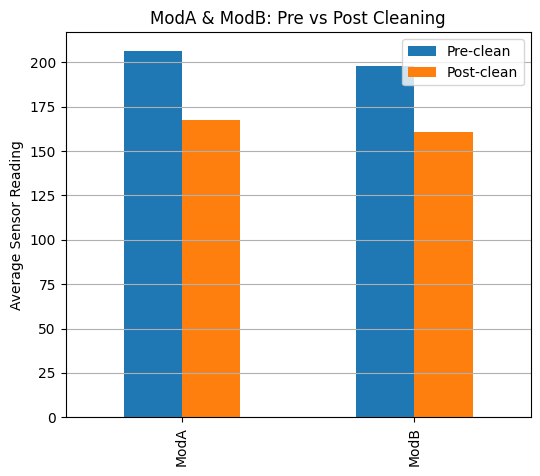

In [37]:
import pandas as pd

# Load raw and cleaned data
df_raw = pd.read_csv("../data/sierraleone-bumbuna.csv")
df_clean = pd.read_csv("../data/serraleone_clean.csv")

# Ensure timestamps match
df_raw['Timestamp'] = pd.to_datetime(df_raw['Timestamp'])
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Optional: only key sensor columns
key_cols = ['ModA','ModB']

# Compute average pre/post cleaning
avg_pre = df_raw[key_cols].mean()
avg_post = df_clean[key_cols].mean()

print("Average sensor readings before cleaning (pre-clean):")
print(avg_pre)

print("\nAverage sensor readings after cleaning (post-clean):")
print(avg_post)

import matplotlib.pyplot as plt

avg_pre_post = pd.DataFrame({'Pre-clean': avg_pre, 'Post-clean': avg_post})
avg_pre_post.plot(kind='bar', figsize=(6,5))
plt.ylabel('Average Sensor Reading')
plt.title('ModA & ModB: Pre vs Post Cleaning')
plt.grid(axis='y')
plt.show()


In [ ]:
# Correlation

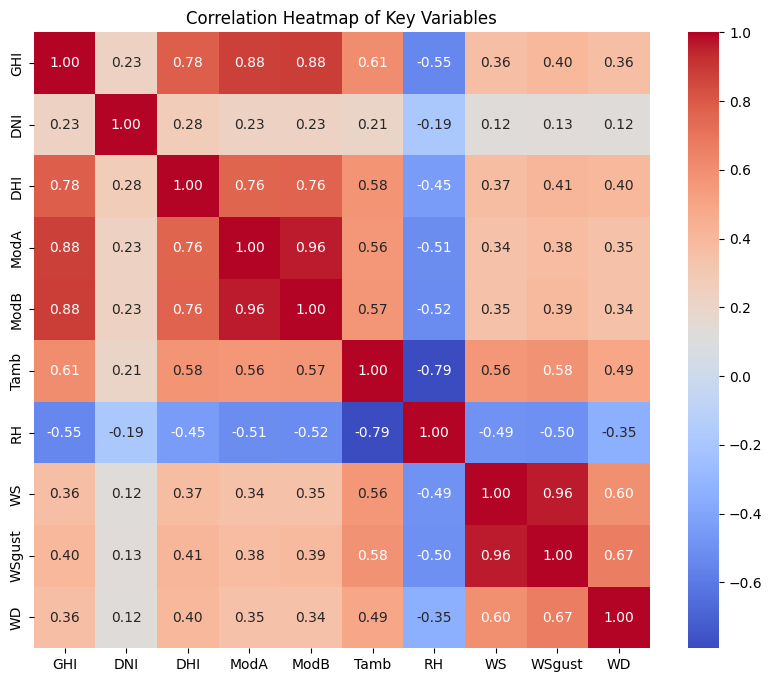

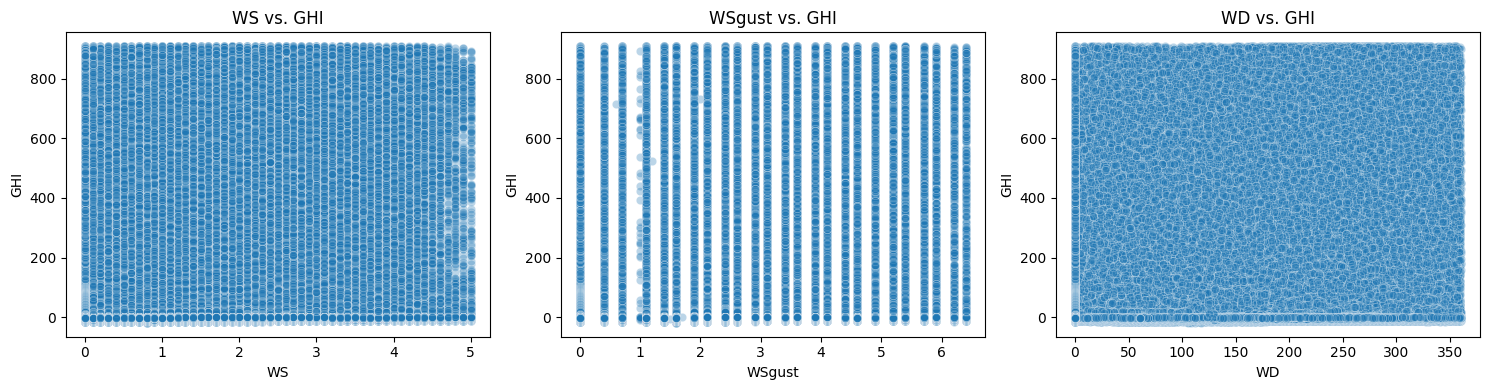

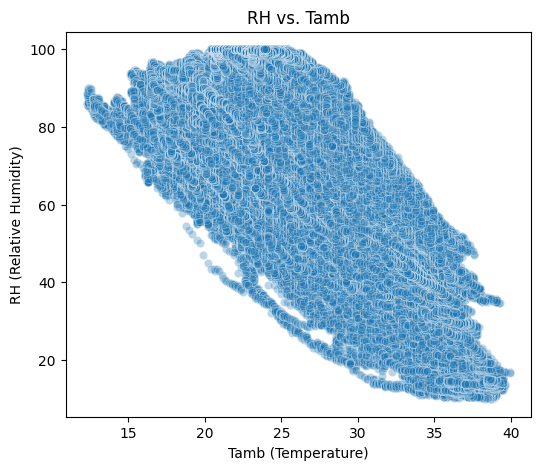

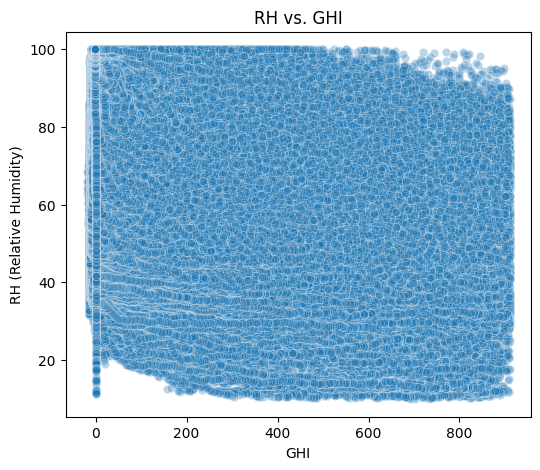

In [43]:

# -------------------------------
# 2️⃣ Correlation Heatmap
# -------------------------------

df = pd.read_csv("../data/serraleone_clean.csv")
# Choose relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Key Variables")
plt.show()

# -------------------------------
# 3️⃣ Scatter Plots
# -------------------------------

# WS, WSgust, WD vs. GHI
scatter_cols = ['WS', 'WSgust', 'WD']
plt.figure(figsize=(15,4))
for i, col in enumerate(scatter_cols, 1):
    plt.subplot(1, len(scatter_cols), i)
    sns.scatterplot(x=df[col], y=df['GHI'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.title(f'{col} vs. GHI')
plt.tight_layout()
plt.show()

# RH vs Tamb
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Tamb'], y=df['RH'], alpha=0.3)
plt.xlabel('Tamb (Temperature)')
plt.ylabel('RH (Relative Humidity)')
plt.title('RH vs. Tamb')
plt.show()

# RH vs GHI
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['GHI'], y=df['RH'], alpha=0.3)
plt.xlabel('GHI')
plt.ylabel('RH (Relative Humidity)')
plt.title('RH vs. GHI')
plt.show()


In [ ]:
# wind and distribution analysis

/tmp/ipykernel_8116/3188525961.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_counts = wind_df.groupby(['WS_cat', 'WD']).size().unstack(fill_value=0)
/home/feven/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


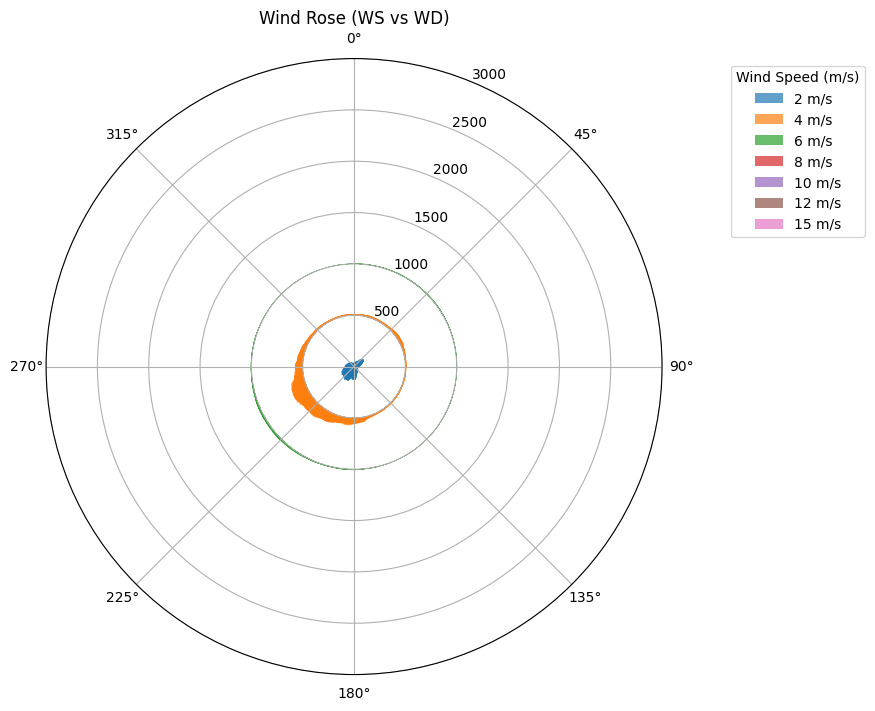

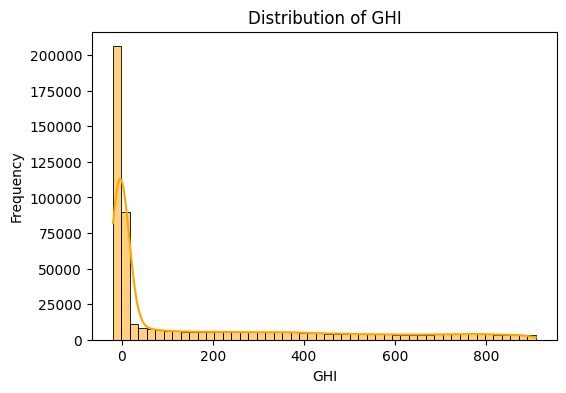

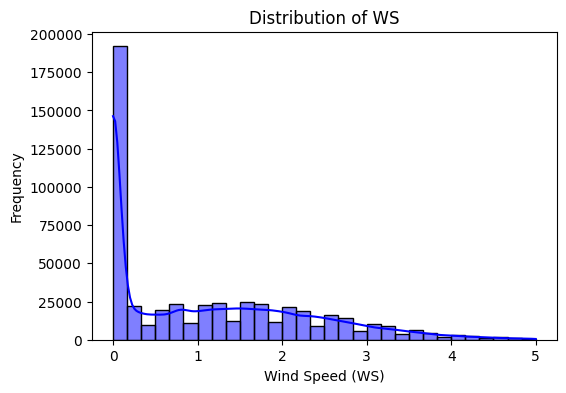

In [42]:
# -------------------------------
# 2️⃣ Wind Rose Plot (WS vs WD)
# -------------------------------

df = pd.read_csv("../data/serraleone_clean.csv")
# Convert degrees to radians for polar plot
wd_rad = np.deg2rad(df['WD'])
ws = df['WS']

# Create bins for wind speed
ws_bins = [0, 2, 4, 6, 8, 10, 12, 15]
ws_cat = pd.cut(ws, bins=ws_bins, labels=ws_bins[1:])

# Aggregate counts for each bin & direction
wind_df = pd.DataFrame({'WD': wd_rad, 'WS': ws, 'WS_cat': ws_cat})
wind_counts = wind_df.groupby(['WS_cat', 'WD']).size().unstack(fill_value=0)

# Polar plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

for i, ws_bin in enumerate(wind_counts.index):
    ax.bar(wind_counts.columns, wind_counts.loc[ws_bin], width=0.1, bottom=i*500, alpha=0.7, label=f'{ws_bin} m/s')

ax.set_theta_zero_location('N')  # 0 deg at top
ax.set_theta_direction(-1)       # clockwise
ax.set_title("Wind Rose (WS vs WD)")
ax.legend(title='Wind Speed (m/s)', bbox_to_anchor=(1.1,1))
plt.show()

# -------------------------------
# 3️⃣ Histograms
# -------------------------------

# Histogram of GHI
plt.figure(figsize=(6,4))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram of WS
plt.figure(figsize=(6,4))
sns.histplot(df['WS'], bins=30, kde=True, color='blue')
plt.title("Distribution of WS")
plt.xlabel("Wind Speed (WS)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Tempratre analysis

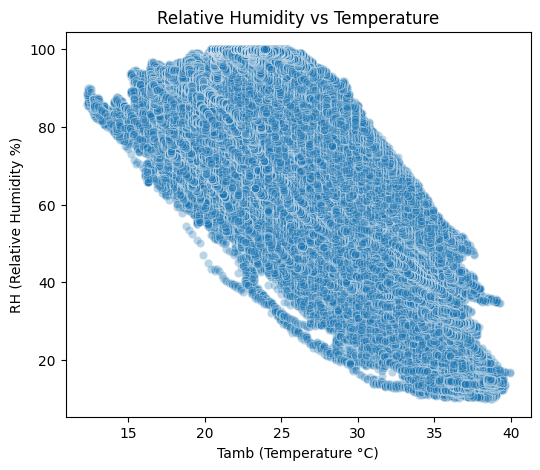

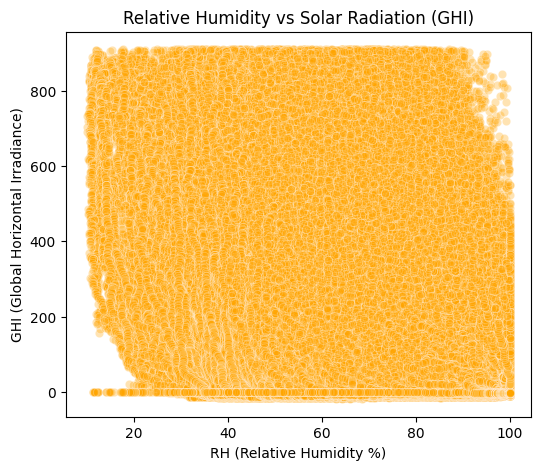

/tmp/ipykernel_8116/3226735879.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = df[['Tamb','RH','GHI']].resample('H').mean()


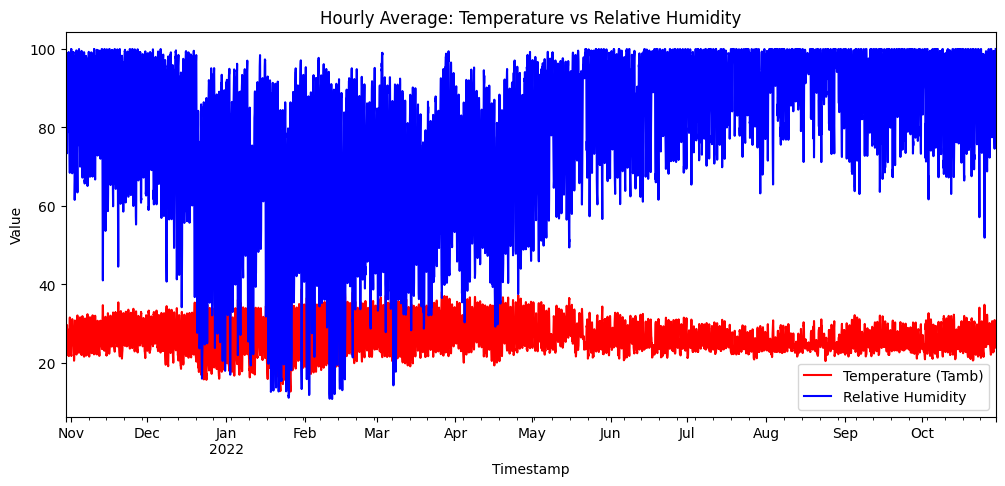

In [40]:

# 1️⃣ Load cleaned data
# -------------------------------
df = pd.read_csv("../data/serraleone_clean.csv")

# -------------------------------
# 2️⃣ Scatter Plot: RH vs Temperature
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x='Tamb', y='RH', data=df, alpha=0.3)
plt.xlabel("Tamb (Temperature °C)")
plt.ylabel("RH (Relative Humidity %)")
plt.title("Relative Humidity vs Temperature")
plt.show()

# -------------------------------
# 3️⃣ Scatter Plot: RH vs GHI
# -------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.3, color='orange')
plt.xlabel("RH (Relative Humidity %)")
plt.ylabel("GHI (Global Horizontal Irradiance)")
plt.title("Relative Humidity vs Solar Radiation (GHI)")
plt.show()

# -------------------------------
# 4️⃣ Line Plot: Daily Trends (Optional)
# -------------------------------
# Convert Timestamp to datetime if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Resample by hour to get average
hourly_avg = df[['Tamb','RH','GHI']].resample('H').mean()

plt.figure(figsize=(12,5))
hourly_avg['Tamb'].plot(label='Temperature (Tamb)', color='red')
hourly_avg['RH'].plot(label='Relative Humidity', color='blue')
plt.ylabel("Value")
plt.title("Hourly Average: Temperature vs Relative Humidity")
plt.legend()
plt.show()


In [ ]:
# Bubble chart

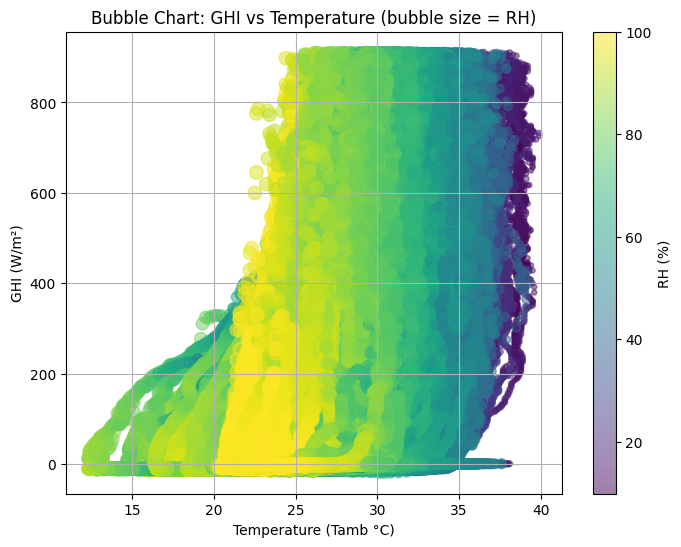

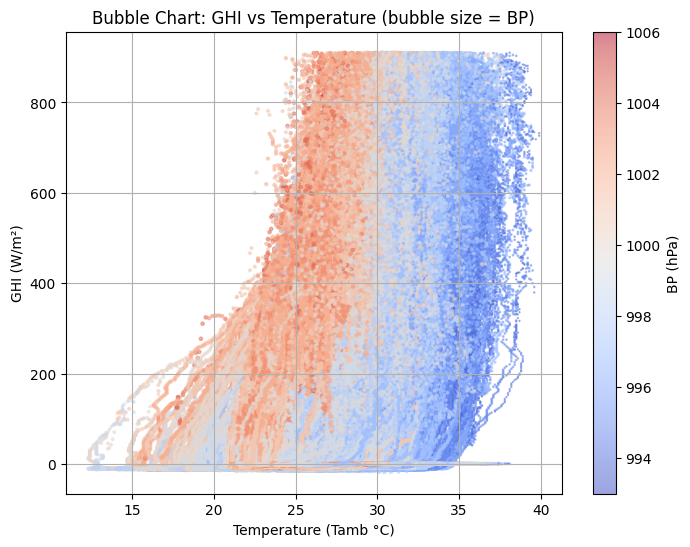

In [41]:

# -------------------------------
# 1️⃣ Load cleaned data
# -------------------------------
df = pd.read_csv("../data/serraleone_clean.csv")

# -------------------------------
# 2️⃣ Bubble Chart: GHI vs Tamb, size = RH
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(
    df['Tamb'], 
    df['GHI'], 
    s=df['RH'],       # Bubble size
    alpha=0.5,        # Transparency
    c=df['RH'],       # Color by RH
    cmap='viridis'
)
plt.colorbar(label='RH (%)')
plt.xlabel("Temperature (Tamb °C)")
plt.ylabel("GHI (W/m²)")
plt.title("Bubble Chart: GHI vs Temperature (bubble size = RH)")
plt.grid(True)
plt.show()

# -------------------------------
# 3️⃣ Bubble Chart: GHI vs Tamb, size = BP
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(
    df['Tamb'], 
    df['GHI'], 
    s=(df['BP']-df['BP'].min())*0.5,  # Scale BP for bubble size
    alpha=0.5,
    c=df['BP'],
    cmap='coolwarm'
)
plt.colorbar(label='BP (hPa)')
plt.xlabel("Temperature (Tamb °C)")
plt.ylabel("GHI (W/m²)")
plt.title("Bubble Chart: GHI vs Temperature (bubble size = BP)")
plt.grid(True)
plt.show()
